### kaggle Titanic dataset deep learning

In [1]:
import functools
import tensorflow as tf
tf.test.is_gpu_available() #https://github.com/tensorflow/tensorflow/issues/38194
import numpy as np
import tensorflow_datasets as tfds
import pandas as pd

/home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [2]:
TRAIN_DATA_PATH = "./data/train.csv"
TEST_DATA_PATH = "./data/test.csv"

train_data = pd.read_csv(TRAIN_DATA_PATH, header=0)
test_data = pd.read_csv(TEST_DATA_PATH, header=0)

In [3]:
# train_data.dtypes
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data['Survived'] = np.nan
# test_data.head()
test_data = test_data[train_data.columns]
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:

data = pd.concat([train_data, test_data], axis=0)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
column_type_dict = data.dtypes.apply(lambda x: x.name).to_dict()

In [9]:
label_column = ["Survived"]

In [10]:
feature_columns = list(set(data.columns) - set(label_column))
dense_feature = list(set(data.select_dtypes(include=np.number).columns) & set(feature_columns))
sparse_feature = list(set(data.select_dtypes(exclude=np.number).columns) & set(feature_columns))
# feature_columns
# dense_feature
sparse_feature

['Name', 'Sex', 'Cabin', 'Ticket', 'Embarked']

In [11]:
%whos

Variable           Type                          Data/Info
----------------------------------------------------------
NamespaceMagics    MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
TEST_DATA_PATH     str                           ./data/test.csv
TRAIN_DATA_PATH    str                           ./data/train.csv
column_type_dict   dict                          n=12
data               DataFrame                          PassengerId  Survive<...>n[1309 rows x 12 columns]
dense_feature      list                          n=6
feature_columns    list                          n=11
functools          module                        <module 'functools' from <...>/python3.7/functools.py'>
get_ipython        function                      <function get_ipython at 0x7fecd6712200>
getsizeof          builtin_function_or_method    <built-in function getsizeof>
json               module                        <module 'json' from '/hom<...>hon3.7/json/__init__.py'>
l

In [12]:
def process_dense_feats(data, feats):
    d = data.copy()
    d = d[feats].fillna(0.0)  # 暂时填充为0
    for f in feats:
        d[f] = d[f].apply(lambda x: np.log(x+1) if x > -1 else -1)
    
    return d

In [13]:
data_dense = process_dense_feats(data, dense_feature)
data_dense

,SibSp,Age,Pclass,PassengerId,Fare,Parch
0,0.693147,3.135494,1.386294,0.693147,2.110213,0.000000
1,0.693147,3.663562,0.693147,1.098612,4.280593,0.000000
2,0.000000,3.295837,1.386294,1.386294,2.188856,0.000000
3,0.693147,3.583519,0.693147,1.609438,3.990834,0.000000
4,0.000000,3.583519,1.386294,1.791759,2.202765,0.000000
...,...,...,...,...,...,...
413,0.000000,0.000000,1.386294,7.174724,2.202765,0.000000
414,0.000000,3.688879,0.693147,7.175490,4.699571,0.000000
415,0.000000,3.676301,1.386294,7.176255,2.110213,0.000000
416,0.000000,0.000000,1.386294,7.177019,2.202765,0.000000


In [14]:
from sklearn.preprocessing import LabelEncoder
def process_sparse_feats(data, feats):
    d = data.copy()
    d = d[feats].fillna("-1")  # 默认填充为-1
    for f in feats:
        label_encoder = LabelEncoder()
        d[f] = label_encoder.fit_transform(d[f])
        
    return d

In [15]:
data_sparse = process_sparse_feats(data, sparse_feature)
data_sparse

,Name,Sex,Cabin,Ticket,Embarked
0,155,1,0,720,3
1,286,0,107,816,1
2,523,0,0,914,3
3,422,0,71,65,3
4,22,1,0,649,3
...,...,...,...,...,...
413,1126,1,0,711,3
414,891,0,65,834,1
415,1046,1,0,872,3
416,1227,1,0,579,3


In [16]:
total_data = pd.concat([data_dense, data_sparse], axis=1)
total_data

,SibSp,Age,Pclass,PassengerId,Fare,Parch,Name,Sex,Cabin,Ticket,Embarked
0,0.693147,3.135494,1.386294,0.693147,2.110213,0.000000,155,1,0,720,3
1,0.693147,3.663562,0.693147,1.098612,4.280593,0.000000,286,0,107,816,1
2,0.000000,3.295837,1.386294,1.386294,2.188856,0.000000,523,0,0,914,3
3,0.693147,3.583519,0.693147,1.609438,3.990834,0.000000,422,0,71,65,3
4,0.000000,3.583519,1.386294,1.791759,2.202765,0.000000,22,1,0,649,3
...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,0.000000,1.386294,7.174724,2.202765,0.000000,1126,1,0,711,3
414,0.000000,3.688879,0.693147,7.175490,4.699571,0.000000,891,0,65,834,1
415,0.000000,3.676301,1.386294,7.176255,2.110213,0.000000,1046,1,0,872,3
416,0.000000,0.000000,1.386294,7.177019,2.202765,0.000000,1227,1,0,579,3


In [17]:
total_data['label'] = data[label_column]

In [18]:
total_data

,SibSp,Age,Pclass,PassengerId,Fare,Parch,Name,Sex,Cabin,Ticket,Embarked,label
0,0.693147,3.135494,1.386294,0.693147,2.110213,0.000000,155,1,0,720,3,0.0
1,0.693147,3.663562,0.693147,1.098612,4.280593,0.000000,286,0,107,816,1,1.0
2,0.000000,3.295837,1.386294,1.386294,2.188856,0.000000,523,0,0,914,3,1.0
3,0.693147,3.583519,0.693147,1.609438,3.990834,0.000000,422,0,71,65,3,1.0
4,0.000000,3.583519,1.386294,1.791759,2.202765,0.000000,22,1,0,649,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,0.000000,1.386294,7.174724,2.202765,0.000000,1126,1,0,711,3,NaN
414,0.000000,3.688879,0.693147,7.175490,4.699571,0.000000,891,0,65,834,1,NaN
415,0.000000,3.676301,1.386294,7.176255,2.110213,0.000000,1046,1,0,872,3,NaN
416,0.000000,0.000000,1.386294,7.177019,2.202765,0.000000,1227,1,0,579,3,NaN


In [19]:
import tensorflow as tf

In [20]:
dense_inputs = []
for f in dense_feature:
    _input = tf.keras.layers.Input([1], name=f)
    dense_inputs.append(_input)

In [21]:
dense_inputs

[<tf.Tensor 'SibSp:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Age:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Pclass:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'PassengerId:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Fare:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Parch:0' shape=(None, 1) dtype=float32>]

In [22]:
# 线性模型
concat_dense_inputs = tf.keras.layers.Concatenate(axis=1)(dense_inputs)
fst_order_dense_layer = tf.keras.layers.Dense(1)(concat_dense_inputs)
liner_model = tf.keras.models.Model(dense_inputs, fst_order_dense_layer)
liner_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
SibSp (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
Age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
Pclass (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
PassengerId (InputLayer)        [(None, 1)]          0                                            
______________________________________________________________________________________________

In [23]:
sparse_inputs = []
for f in sparse_feature:
    _input = tf.keras.layers.Input([1], name=f)
    sparse_inputs.append(_input)
sparse_inputs

[<tf.Tensor 'Name:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Sex:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Cabin:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Ticket:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Embarked:0' shape=(None, 1) dtype=float32>]

In [24]:
import math
import re
sparse_1d_embed = []
for _input in sparse_inputs:
    f = re.split('[_:]', _input.name)[0]
    voc_size = data[f].nunique()
    _embed = tf.keras.layers.Flatten(name=f+"_flatten")(tf.keras.layers.Embedding(voc_size+1, 100, embeddings_regularizer=tf.keras.regularizers.l2(0.5))(_input))
    sparse_1d_embed.append(_embed)
sparse_1d_embed

[<tf.Tensor 'Name_flatten/Identity:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'Sex_flatten/Identity:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'Cabin_flatten/Identity:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'Ticket_flatten/Identity:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'Embarked_flatten/Identity:0' shape=(None, 100) dtype=float32>]

In [25]:
fst_order_sparse_layer = tf.keras.layers.Add()(sparse_1d_embed)
sparse_model = tf.keras.models.Model(sparse_inputs, fst_order_sparse_layer) # a + b
sparse_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Name (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Sex (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
Cabin (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
Ticket (InputLayer)             [(None, 1)]          0                                            
____________________________________________________________________________________________

In [26]:
k = 8
# 只考虑sparse的二阶交叉
sparse_kd_embed = []
for feat, _input in enumerate(sparse_inputs):
    f = sparse_feature[feat]
    voc_size = data[f].nunique()
    _embed = tf.keras.layers.Embedding(voc_size+1, k, embeddings_regularizer=tf.keras.regularizers.l2(0.7))(_input)
    sparse_kd_embed.append(_embed)
sparse_kd_embed

[<tf.Tensor 'embedding_5/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_6/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_7/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_8/Identity:0' shape=(None, 1, 8) dtype=float32>,
 <tf.Tensor 'embedding_9/Identity:0' shape=(None, 1, 8) dtype=float32>]

In [48]:
concat_sparse_kd_embed = tf.keras.layers.Concatenate(axis=1)(sparse_kd_embed) 
tf.keras.models.Model(sparse_inputs, concat_sparse_kd_embed).summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Name (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Sex (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
Cabin (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
Ticket (InputLayer)             [(None, 1)]          0                                            
____________________________________________________________________________________________

In [51]:
import tensorflow.keras.backend as K
sum_kd_embed = tf.keras.layers.Lambda(lambda x: K.sum(x, axis=1))(concat_sparse_kd_embed)  # ?, k

square_sum_kd_embed = tf.keras.layers.Multiply()([sum_kd_embed, sum_kd_embed])  # ?, k
tf.keras.models.Model(sparse_inputs, square_sum_kd_embed).summary()


AttributeError: module 'tensorflow' has no attribute 'sum'

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import *

square_kd_embed = Multiply()([concat_sparse_kd_embed, concat_sparse_kd_embed]) # ?, n, k
sum_square_kd_embed = Lambda(lambda x: K.sum(x, axis=1))(square_kd_embed) 

In [30]:
sub = Subtract()([square_sum_kd_embed, sum_square_kd_embed])
sub = Lambda(lambda x: x*0.5)(sub)
snd_order_sparse_layer = Lambda(lambda x: K.sum(x, axis=1, keepdims=True))(sub)

In [31]:
interaction_part = snd_order_sparse_layer

In [32]:
logits = Add()([linear_part, interaction_part])
output_layer = Activation("sigmoid")(logits)

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [34]:
model = Model(dense_inputs+sparse_inputs, output_layer)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Name (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Sex (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
Cabin (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
Ticket (InputLayer)             [(None, 1)]          0                                            
____________________________________________________________________________________________

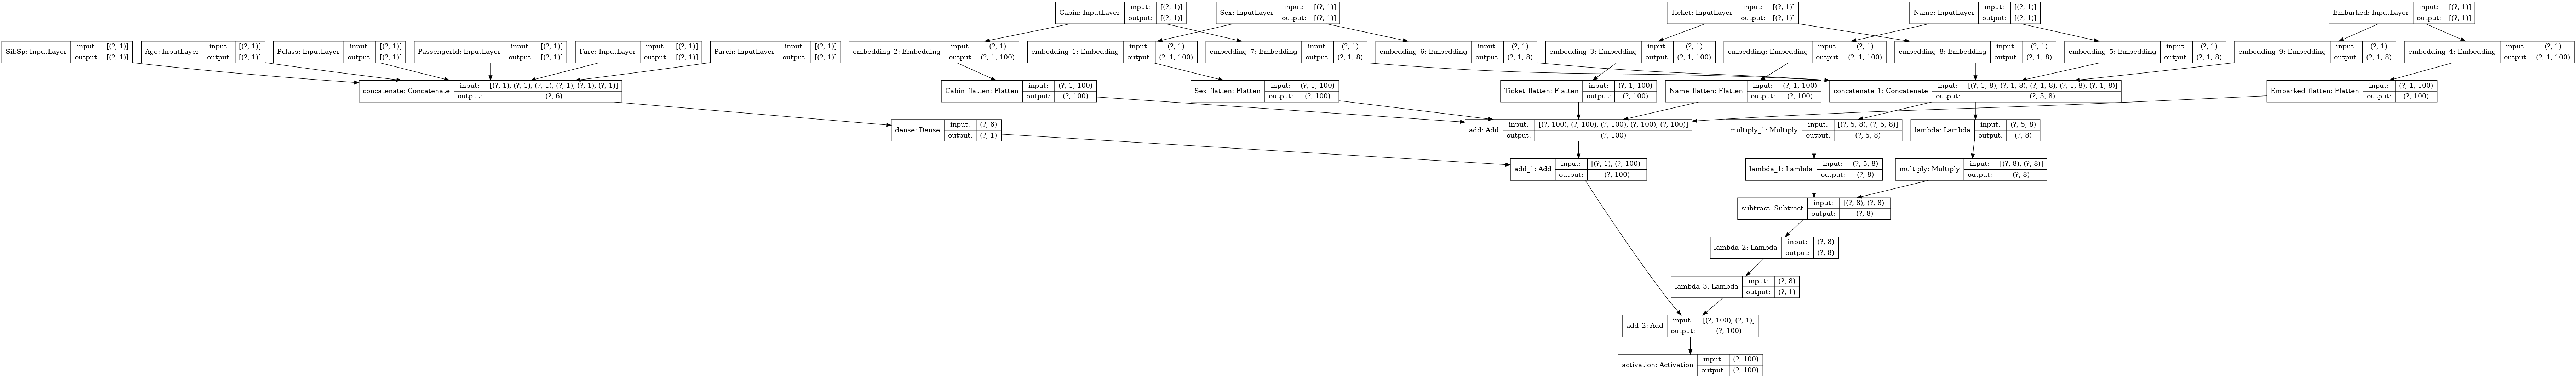

In [37]:
plot_model(model, "fm_model.png", show_shapes=True)

In [62]:
! pip install pydot

Looking in indexes: https://pypi.doubanio.com/simple


In [38]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics=["binary_crossentropy", tf.keras.metrics.AUC(name='auc')])

In [39]:
from tensorflow.keras.callbacks import TensorBoard

In [40]:
tbCallBack = TensorBoard(log_dir='./logs',  # log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)

In [41]:
test_data = total_data[total_data["label"].isna()]
train_data = total_data[total_data["label"].notna()]
valid_data = train_data.loc[750:]
train_data = train_data.loc[:750 - 1] # 闭区间

In [42]:
train_dense_x = [train_data[f].values for f in dense_feature]
train_sparse_x = [train_data[f].values for f in sparse_feature]

In [43]:
train_label = [train_data['label'].values]

In [44]:
train_label

[array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
        0., 

In [45]:
val_dense_x = [valid_data[f].values for f in dense_feature]
val_sparse_x = [valid_data[f].values for f in sparse_feature]

In [46]:
val_label = [valid_data['label'].values]

In [47]:
model.fit(train_dense_x+train_sparse_x, 
          train_label, epochs=50, batch_size=256,
          validation_data=(val_dense_x+val_sparse_x, val_label), 
          callbacks=[tbCallBack])

Epoch 1/50


ValueError: in user code:

    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1595 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4692 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /home/yons/.pyenv/versions/3.7.4/envs/py37/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:172 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 100) vs (None, 1))


In [73]:
test_dense_x = [test_data[f].values for f in dense_feature]
test_sparse_x = [test_data[f].values for f in sparse_feature]

In [74]:
pred = model.predict(test_dense_x+test_sparse_x)
# pred.head()

In [75]:
y_pred = [ 1 if i[0] > 0.5 else 0 for i in pred ]
# y = [ 1 if pred[0] > 0.5 else 0 for i in pred ]

In [76]:
y_pred

from pandas.core.frame import DataFrame
c = {"Survived":y_pred #,'b':b
    }  #将列表a，b装换成字典
 
pd_y = DataFrame(c)
print(pd_y)

     Survived
0           0
1           0
2           0
3           0
4           0
..        ...
413         0
414         0
415         0
416         0
417         1

[418 rows x 1 columns]


In [77]:
test_data = pd.read_csv(TEST_DATA_PATH, header=0)
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
submission = pd.concat([test_data['PassengerId'], pd_y], axis=1)
submission.to_csv('submission.csv', header=True, index=False)

In [ ]:
! pip install kaggle

In [52]:
!kaggle competitions submit -c titanic -f submission.csv -m "tensorflow fm"

100%|████████████████████████████████████████| 2.77k/2.77k [00:07<00:00, 358B/s]
Successfully submitted to Titanic: Machine Learning from Disaster